In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity
import scipy.stats
from scipy import integrate


In [2]:
def func(spin):
    return ((1+(1-spin**2)**0.5)/2)**0.5


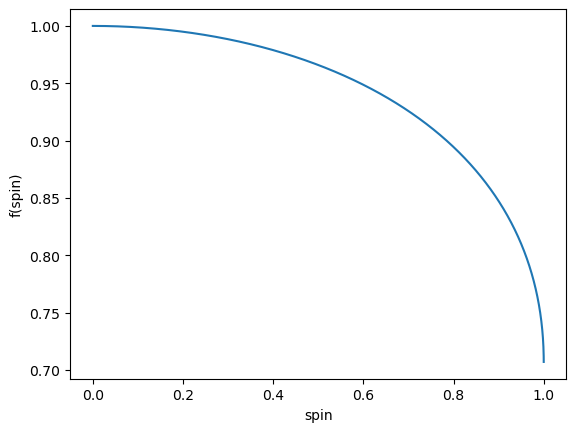

In [3]:
N=10000

xspin = np.linspace(0, 1, N)

plt.figure(dpi = 100)
plt.plot(xspin, func(xspin))
plt.xlabel('spin')
plt.ylabel('f(spin)')
plt.show()

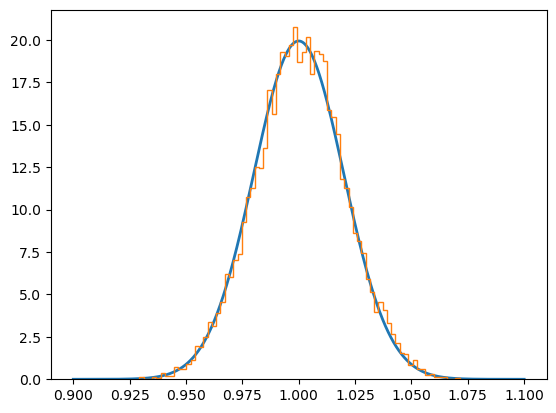

In [4]:
mu=1
sigma=0.02
plt.figure(dpi = 100)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, N)
M = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x,M,lw=2)
M = np.random.normal(loc=mu, scale=sigma, size=N)
plt.hist(M,density=True,histtype='step',bins=75,lw=1)
plt.show()

(array([0.06188952, 0.02062984, 0.08251936, 0.06188952, 0.14440888,
        0.12377904, 0.14440888, 0.12377904, 0.2062984 , 0.39196695,
        0.35070727, 0.39196695, 0.41259679, 0.43322663, 0.37133711,
        0.57763551, 0.59826535, 0.30944759, 0.94897262, 0.9902323 ,
        0.90771294, 0.86645326, 0.92834278, 1.34093957, 1.01086214,
        1.17590086, 1.23779038, 1.38219925, 1.27905006, 1.54723797,
        1.73290653, 1.42345893, 1.58849765, 1.60912749, 1.95983476,
        2.43432107, 2.186763  , 2.68187915, 2.61998963, 2.55810011,
        2.80565819, 2.68187915, 3.03258642, 3.13573562, 3.54833241,
        3.30077434, 4.1672276 , 4.02281872, 4.33226632, 5.05431071,
        4.86864215, 5.40501798, 5.65257605, 6.80784707, 6.91099627,
        7.71556002, 8.39634472, 8.58201328, 8.747052  , 9.5309859 ,
        9.75791414, 8.78831168, 8.89146087, 7.5505213 , 5.96202365,
        5.54942686, 3.65148161, 3.03258642, 1.56786781, 1.32030974,
        1.13464118, 0.70141455, 0.24755808, 0.18

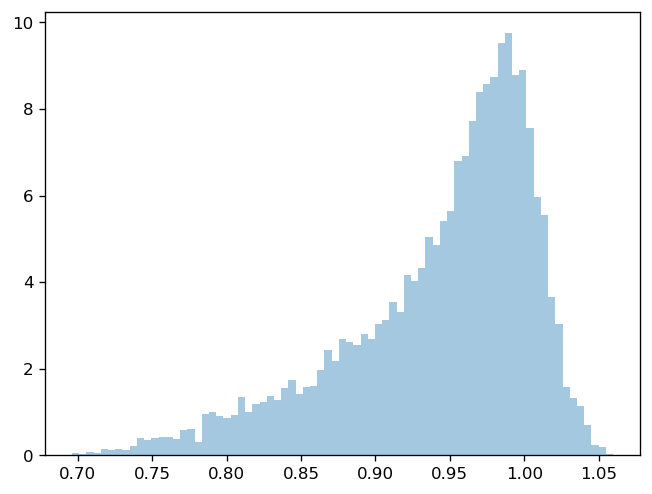

In [5]:
xspin= np.random.uniform(0,1,N)
#i need to plot Mirr, so multiply for func(spin)
plt.figure(dpi = 120)
plt.hist(M*func(xspin),density=True,histtype='bar', alpha=0.4, bins=75, label='Mirr')

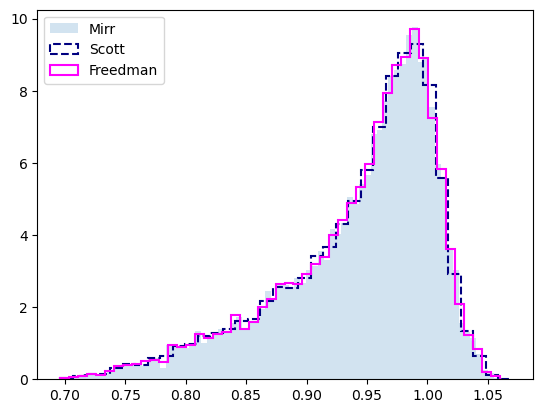

In [6]:
plt.hist(M*func(xspin),density=True,histtype='bar', alpha=0.2, bins=75, label='Mirr')
_ = fancyhist(M*func(xspin), bins="scott", histtype="step", density=True, color='navy', ls='--', label='Scott', lw=1.5)
_ = fancyhist(M*func(xspin), bins="freedman", histtype="step",density=True, color='magenta', label='Freedman', lw=1.5)
plt.legend()
plt.show()

The calculation of the KDE is moved below for convenience. \
Here the Kolmogorov-Smirnov test:

In [7]:
#KS distance between Mirr and f/M: f/M needs to be in function of sigma
sigmas = np.logspace(-5, 5, 30) #can't find another that behaves well
ks_test_M = []
ks_test_f = []

for s in sigmas:
    M = np.random.normal(loc=mu, scale=s, size=N)
    f = func(xspin)
    ks_test_f.append(np.array(scipy.stats.ks_2samp(f, M*func(xspin))[0]))
    ks_test_M.append(np.array(scipy.stats.ks_2samp(M, M*func(xspin))[0]))

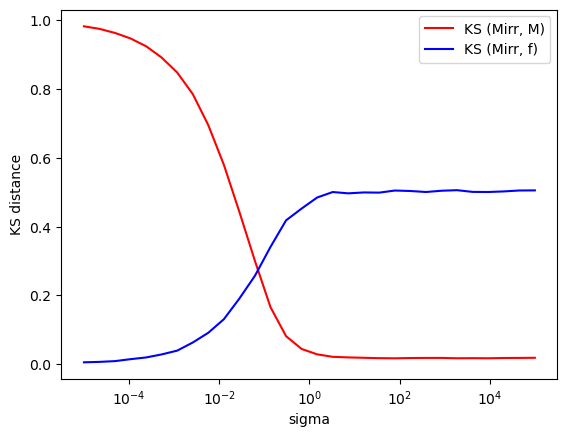

In [8]:
plt.figure(dpi = 100)    
plt.plot(sigmas, ks_test_M, label='KS (Mirr, M)', color='red')
plt.plot(sigmas, ks_test_f, label='KS (Mirr, f)', color='blue')
plt.xlabel('sigma')
plt.ylabel('KS distance') #for small sigma Mirr is distributed like f as KS distance is minimize, for the same reason for large sigma-> M
plt.semilogx()
plt.legend()
plt.show()

Now I need the pdf of f, below the steps:
1. **Identify the Distribution of \( X \)**: Determine the PDF $p_X(x)$ of the random variable \( X \).

2. **Compute the Inverse Transformation**: Find the inverse function ( $x = f^{-1}(y)$).

3. **Compute the Derivative of the Inverse**: Calculate  $\left|\frac{dx}{dy}\right|$.

4. **Transform the PDF**: Use the formula for the PDF of the transformed variable $Y$:
   $p_Y(y) = p_X(x) \left|\frac{dx}{dy}\right|$
   where $x = f^{-1}(y)$.

C:\Users\Asus\AppData\Local\Temp\ipykernel_5656\709326669.py:6: RuntimeWarning: divide by zero encountered in divide
  pdf_f = 2*(2*f**2-1)/(1 -f**2)**0.5


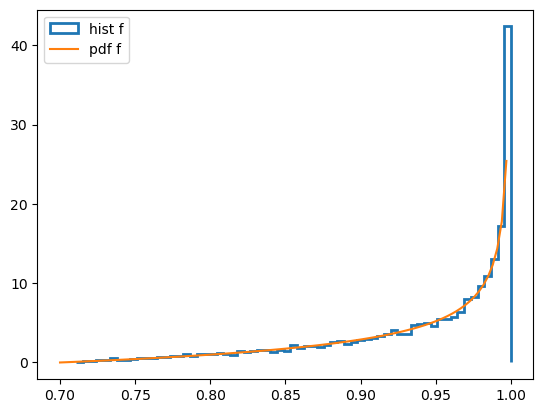

In [10]:
plt.figure(dpi = 100)
xspin= np.random.uniform(0,1,N)
f = func(xspin)
plt.hist(f,density=True,histtype='step',bins=65,lw=2, label='hist f')
f= np.linspace(0.7, 1, 100)
pdf_f = 2*(2*f**2-1)/(1 -f**2)**0.5 
plt.plot(f,pdf_f,lw=1.5, label='pdf f')
plt.legend()
plt.show()

Pdf of Mirr

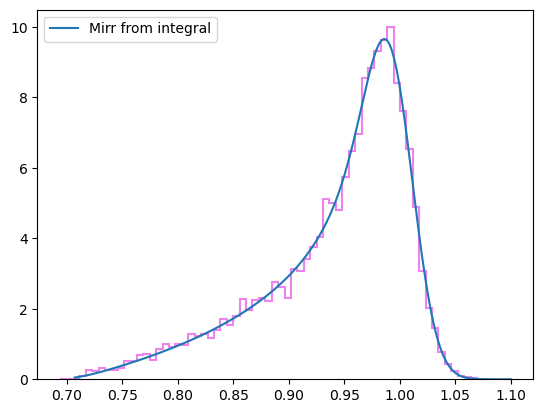

In [17]:
plt.figure(dpi = 100)
sigma=0.02
x = np.linspace(mu - 5*sigma, mu + 5*sigma, N)
M = np.random.normal(loc=mu, scale=sigma, size=N)
f = func(xspin)
plt.hist(f*M,density=True,histtype='step',color='violet', bins=65,lw=1.5)
m_irr = np.linspace(min(1-5*sigma,1/np.sqrt(2)), mu + 5*sigma, N) 
#1/np.sqrt(2) is from the domain of the function, it's where the pdf->0

def integrand(f,m_irr, sigma):
    return ((2/np.pi)**0.5 / sigma ) * np.exp(-(m_irr/f -1)**2 /(2*sigma**2)) * (2*f**2-1)/(1 - f**2)**0.5 / f

#now solve the integral
Mirr = np.array([integrate.quad(integrand, 1/np.sqrt(2), 1, args=(m, sigma))[0] for m in m_irr])
plt.plot(m_irr,Mirr,lw=1.5, label='Mirr from integral')
plt.legend()
plt.show()

**KDE**

In [19]:
def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)


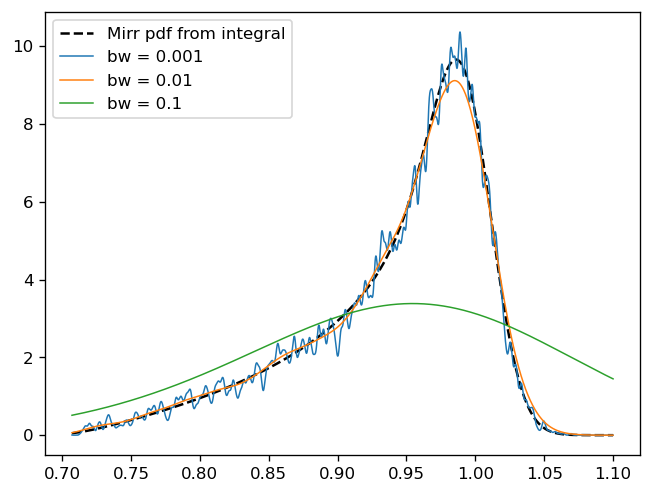

In [25]:
plt.figure(dpi = 120)
x=np.linspace(1/np.sqrt(2),1+5*sigma,N) 
plt.plot(x,Mirr,lw=1.5,ls='--', color='black', label='Mirr pdf from integral')
PDFgaussian1 = kde_sklearn(M*func(xspin),bandwidth=0.001, kernel="gaussian") 
plt.plot(x, PDFgaussian1, lw=0.9, label='bw = 0.001')
PDFgaussian2 = kde_sklearn(M*func(xspin),bandwidth=0.01,kernel="gaussian") 
plt.plot(x, PDFgaussian2 ,lw=0.9, label='bw = 0.01')  
PDFgaussian3 = kde_sklearn(M*func(xspin),bandwidth=0.1,kernel="gaussian") 
plt.plot(x, PDFgaussian3 , lw=0.9, label='bw = 0.1')  
plt.legend()
plt.show()

The bandwidth that better approximates the Mirr pdf is bw = 0.001, but it is also very floating around the exact values